<a href="https://colab.research.google.com/github/dustoff06/EcoMod/blob/Day-3-Files/Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3

# Classification
Classification problems are ubiquitous.  Any time we seek to predict something that is non-quantitative, we find ourselves in their realm.  Further, even if the nature of the problem is quantitative, we can often discretize the variable of interest to return right back to classification.  This lesson will introduce the problem of classification and discuss several methods that are often used.

## Background
The classification problem arises when we are interested in explaining or predicting a qualitative variable, one measured at the nominal or ordinal level of measurement.  These types of problems occur arguably more frequently than regression problems, as any quantitative variable might be discretized to make it qualitative in some fashion. In this lesson, we will discuss the use of logistic regression, naïve Bayes, and other methods.

Let’s take the use case of predicting bankruptcy, a classic example.  In this case, bankruptcy is modeled as a binary variable.  Perhaps, we want to model it as a function of financial ratios.  Why couldn’t we use regression?  Well, we could, but regression would generate predictions outside of zero and one since the Gaussian error link exists from negative infinity to infinity, and some of the common assumptions assumed about regression (e.g., independence of errors) would not hold.

Also, the case is quite more bleak when we consider more than two classification levels.  Let’s say we want to forecast what type of bankruptcy a firm would file, e.g., None, Chapter 9, Chapter 11.  Here, we have three classes, and there is no reason to assume that any ordering of the three is better than the other.  Thus, the prediction plane has no interpretability.

# Logistic Regression

So we introduce logistic regression.  Instead of our traditional assumption that the left-hand side  is the original variable, we convert the dependent variable to an odds ratio:  

$$ Eq1: P(y=1│X)=$$
$$$$
$$Eq2:  P(X)=\frac{exp⁡(β_0+β_1 X_1+..)}{1+exp⁡(β_0+β_1 X_1+.. }→$$
$$$$
$$ Eq3: \frac{P(X)}{(1-P(X)}=exp⁡(β_0+β_1 X_1+..)→$$
$$$$
$$Eq4:  \frac{log⁡(P(X)}{1-P(X) }=β_0+β_1 X_1+...$$

In this formulation, we investigate the probability that Y=1 given our independent variable(s) (Equation 1).  If we model this as a logistic function (Equation 2), then we have a non-decreasing function that lives between 0 and 1 (Figure 1).  With some manipulation, we generate the odds ratio (the probability of success over the probability of failure, P(X)/(1-P(X) ) , in Equation 3.  And finally, we take-the logarithm of both sides to generate the log odds as a function of our traditional regression equation.  To estimate the beta coefficients, we use maximum likelihood estimation.

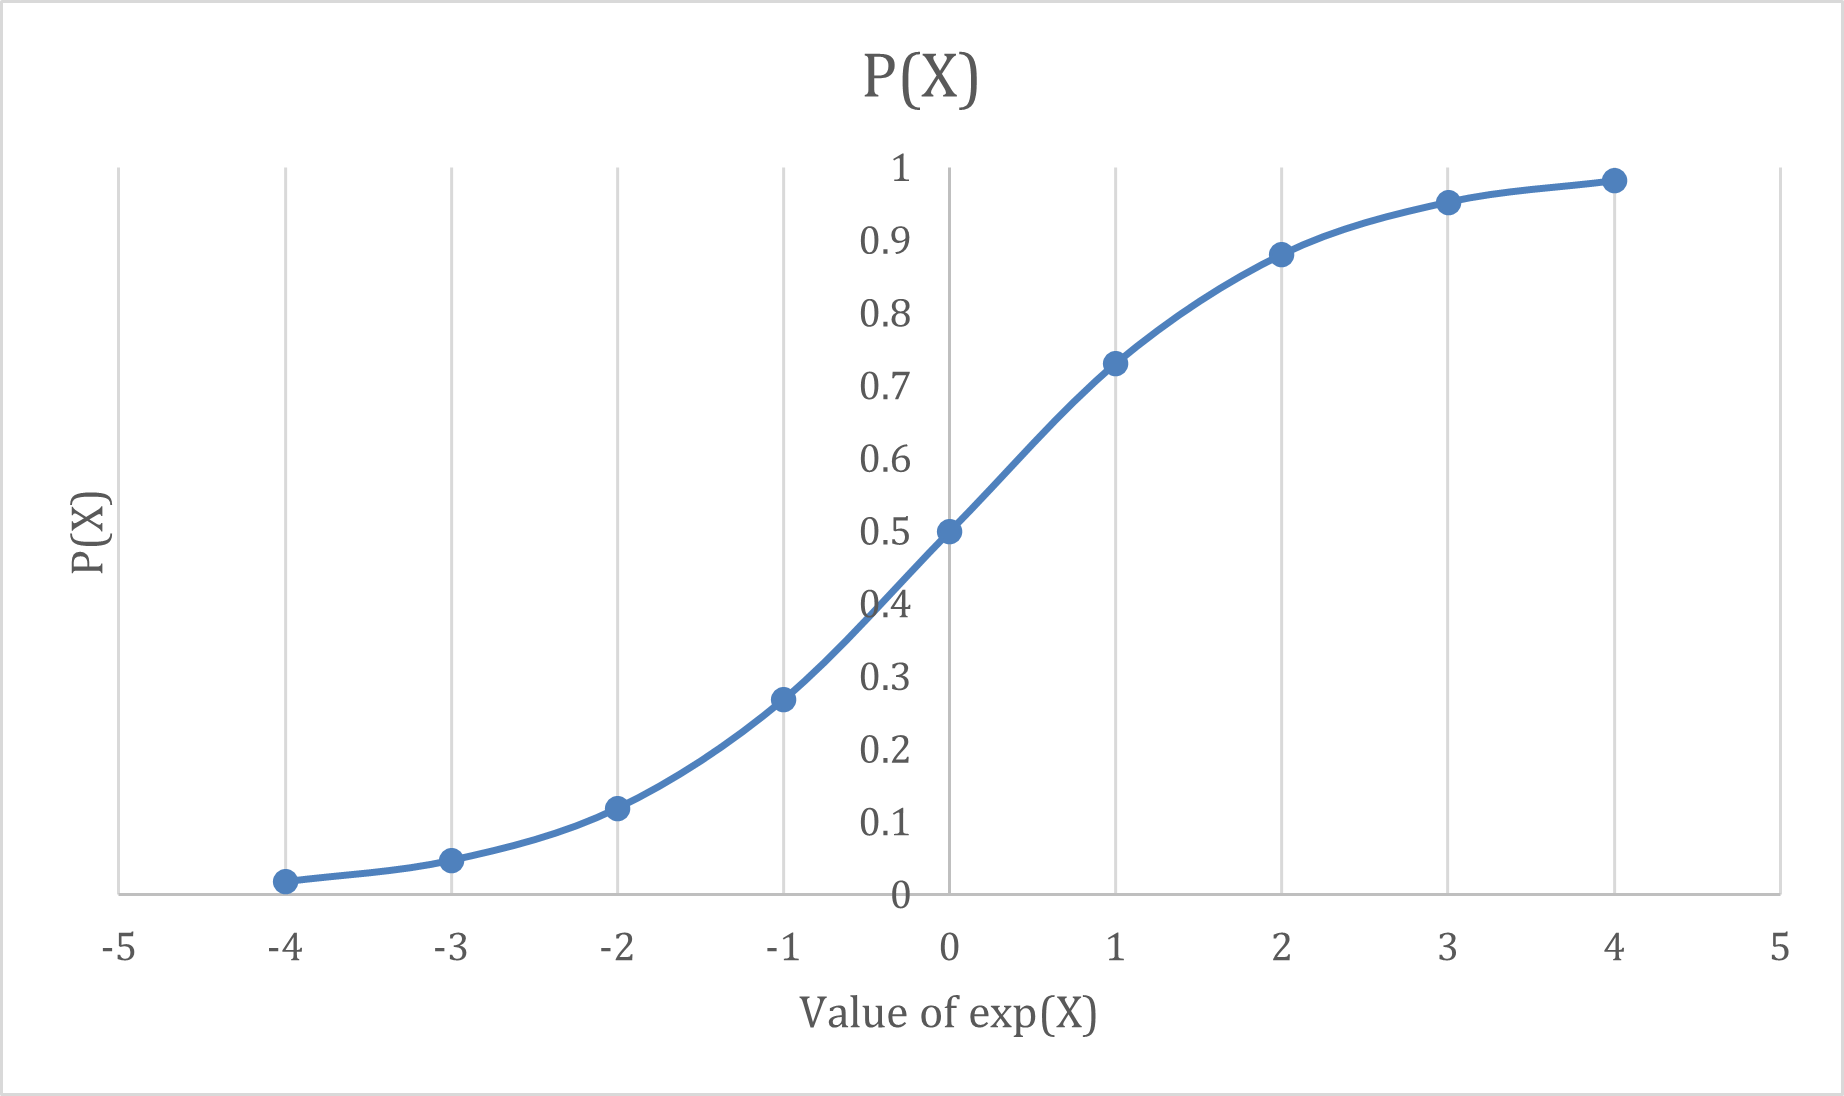

## Assumptions of Logistic Regression

1. Binary Outcome Variable
The dependent variable must be binary, which means it only has two possible outcomes (e.g., pass/fail, yes/no, 0/1).

Testing:
Check the data: Ensure that the dependent variable consists only of two categories.
2. Linearity of Independent Variables and Log Odds
Although the relationship between the dependent and independent variables is not assumed to be linear, the logistic regression does require the log odds of the dependent variable to be a linear combination of the independent variables.

Testing:
Link function check: No formal test, but visually check the appropriateness of logistic regression as a model by plotting predictor vs. log odds plots if feasible.
3. No Multicollinearity
The model assumes that there is little or no multicollinearity among the independent variables.

Testing:
Variance Inflation Factor (VIF): Calculate the VIF for each predictor; a VIF value greater than 10 is often considered an indication of multicollinearity.
Correlation matrix: Review the correlation matrix among predictors. High correlations (e.g., above 0.8) might indicate problematic multicollinearity.
4. Independence of Observations
The observations should be independent of each other. This is particularly important in time series or spatial data, where this assumption might be violated.

Testing:
Durbin-Watson Test: For time series data, this test checks for autocorrelation in the residuals.
Design or data-collection strategy assessment: Evaluate how the data were collected to ensure independence.
5. Large Sample Size
Logistic regression requires a large sample size to ensure reliable results. Generally, the rule of thumb is that there should be at least 10 cases with the least frequent outcome for each predictor in the model.

Testing:
Sample size adequacy: Calculate the number of cases per predictor and check against the rule of thumb.
6. No Extreme Outliers
Outliers can exert an unduly large influence on the logistic regression model, more so than in linear regression.

Testing:
Residual analysis: Inspect residuals for outliers. Leverage plots can help identify influential outliers.
Box plots or scatter plots: Visually inspect for outliers in the data.
7. Goodness of Fit
The model should fit the data well.

Testing:
Hosmer-Lemeshow Test: A statistical test for goodness of fit for logistic regression models.
Deviance and Pearson residuals: Examine the deviance and Pearson residuals for patterns that might indicate poor model fit.
These tests and checks help verify the validity of the assumptions underpinning logistic regression analysis, thereby improving the reliability and interpretability of the model’s outputs.

# Multinomial Logistic Regression

Multinomial Logistic Regression

Multinomial logistic regression extends the dependent variable into more than two classes.  We do so by extending logistic regression.  First, we need to select a referent category for the dependent variable.  For example, let’s say we are interested in predicting from which port a passenger on the Titanic departed.  Then we might select the modal response  (Southampton) as the referent category. The other two departure ports will be compared to this referent port. The procedure becomes the same.  We evaluate $\frac{P(Y=Cherbourg|X)}{(1-P(Y=Southampton|X) } $ and again $\frac{P(Y=Queensland|X)}{(1-P(Y=Southampton|X) }$.  These formulations are exactly what we did above, except that we used $P(Y=Survived|X)/(1-P(Y=Died|X))$.   Multinomial logistic regression is easily implemented in Python with cross-validation as shown below.

1. Multinomial Distribution of the Outcome
The dependent variable in multinomial logistic regression is categorical with more than two unordered categories.

Testing:
Data Inspection: Review the dependent variable to ensure it is categorical and contains more than two categories.
2. Independence of Observations
Each observation should be independent of the other. This assumption is crucial for the reliability of the estimates.

Testing:
Data Collection Review: Assess the data collection process to confirm that the observations are independent.
Durbin-Watson Test: For time series data, this can help detect autocorrelation in the residuals.
3. No Multicollinearity
Similar to binary logistic regression, multicollinearity among independent variables should be minimal because it can affect the stability and interpretation of the coefficients.

Testing:
Variance Inflation Factor (VIF): Values greater than 10 might suggest significant multicollinearity.
Correlation Matrix: High correlation coefficients between predictors indicate multicollinearity.
4. Linearity of the Logit
The logit (log-odds) of the outcome categories relative to the reference category should have a linear relationship with the predictor variables.

Testing:
Link Function Check: While there’s no formal test, the use of appropriate plots (e.g., log odds vs. predictors) can help assess the linearity assumption.
5. Large Sample Size
The model requires a sufficiently large sample size to ensure the stability and reliability of the estimates, with enough observations in each category of the outcome.

Testing:
Sample Size Review: Ensure that there are at least 10 cases per predictor for each category of the outcome. This rule can vary, so additional literature review may be necessary.
6. Absence of Strong Outliers
Outliers can significantly influence the fit and interpretation of a multinomial logistic regression model.

Testing:
Residual Analysis and Influence Statistics: Identify outliers using residual plots, leverage values, or Cook’s distance.
Box Plots and Scatter Plots: These can be used to visually identify outliers in the data.
7. Goodness of Fit
The model should appropriately fit the data without significant underfitting or overfitting.

Testing:
Likelihood Ratio Test: Compare nested models to assess model adequacy.
Pseudo R-squared: Measures like McFadden’s R-squared can provide insights into the model fit.
Deviance and Pearson Goodness-of-Fit Statistics: Use these to assess the overall fit of the model.
8. Independence of Irrelevant Alternatives (IIA)
This assumption is unique to multinomial and conditional logistic regression. It states that the odds of preferring one category over another are independent of the presence or absence of other alternatives.

Testing:
Hausman-McFadden Test: Specifically tests the IIA assumption.
Nested Logit Model: If IIA is violated, consider using a nested logit model which relaxes the IIA assumption.



In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import pandas as pd
import numpy as np
train=pd.read_csv('/content/train2.csv')
train=pd.get_dummies(train, columns=['Sex'])

model = lr(multi_class='multinomial', solver='lbfgs')
X=train[['Survived','Sex_male']]
y=train.Pclass-1
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print(np.mean(n_scores), np.std(n_scores))



0.5439700374531834 0.033311262469854004


# Linear Discriminant Analysis

Another classifier is Linear Discriminant Analysis (LDA), a type of Bayes’ classifier.  LDA is based on the assumption that the distribution of the predictors is normal and (for simplicity) that each of the predictors as homogenous variance.  If we let $\phi$ represent the Gaussian pdf and assume k classes each with prior probabilities of p (perhaps equal  or equal to their proportion of occurrence), then LDA makes the following assumptions about the distribution of $P(Y=1|X)=P(X)=\frac{p_k ϕ_(μ_k,σ)}{∑_1^K(p_i ϕ_(μ_i,σ))}$.  The small p are the prior probabilities of each class k. The value of k for which this equation is the largest is where any individual observation is assigned based on Bayes’ classification.  If we have 2 classes and assume equal proportions for each of the class as our priors, then we can readily derive the decision boundary between the 2 as the average of the means:  $(μ_1+μ_2)/2$.  Regardless, LDA requires that we estimate p, mu, and sigma.

# Naïve Bayes

Naïve Bayes is another Bayes’ classifier that makes a single assumption:  the predictors are independent within each of the k classes. This assumption implies that we can take the product of the independent variable probability distribution functions to estimate the distribution of the dependent variable.  We no longer have to worry about the covariance structure among the predictors.  We have assumed that away.

Our Naïve Bayes classifier is then $$P(y=k│X)=  \frac{(p_k×f_k1×f_k2×…)}{∑_1^k p_i ×f_i1×f_i2×…)}$$.    

If X is quantitative, we assume normality with a diagonal covariance matrix.  If X is qualitative, we partition the data to find the proportion in each class.  


# Support Vector Classifiers
A Support Vector Machine (SVM) seeks to find the optimal separating hyperplane for data.  In n-dimensions, the hyperplane is nothing more than the right-hand side of a multiple linear regression equation, a set of parameters (betas) times their associated variables (x’s).  This n-dimensional hyperplane in SVM serves to provide the line for which a maximal separation between variable of interest group membership might be obtained.
Let’s assume we have two class labels, survived and died, and that these labels are now coded y= {1 , -1}, respectively.  The separating hyperplane approach will look for the betas that satisfy the following:  $$y∑_1^kβ_i X_i >0$$.  
In Python, SVM can be implemented using the sklearn library.


# Tree-based Methods

Tree-based methods support both classification and regression but are quite popular for the former problem.  This week,  you will extend your toolkit to include decision trees, forests, boosted / bagged models, and ensembles.  These are foundational skills for a data scientist.  NOTE:  tree-based methods are scale invariant.  *Scaling does not interfere with the analysis.*

## Trees
Trees are a powerful method for handling classification (and regression) task that essentially select variables and variable splits based on a criteria (e.g., gini or entropy) that result in the most improved performance on their task.  There are two steps in building trees:  stratifying the data into distinct,  non-overlapping regions and then assigning every observations in those regions the same prediction.  While it sounds simple, the implementation is a bit more complex.
So how do we split the data into regions?  We use recursive binary splitting.  If our goal is to conduct regression, then we select the first variable Xj and cut point s that results in the largest reduction in the sum of the squared error between the regions formed by  ${X │ X_j≥s},{X| X_j<s}$.

If our goal is classification, then we have other choices such as the Gini index and entropy.  The Gini index is defined as $∑_1^kp_{mi} (1-p_{mi})$.  

In the case of a two-class variable, we have $1-∑_0^1p_i^2 $. (Other forms of the Gini index exist.  It’s not hard to tell that the Gini index has small values when the probability of a class is either very high or very low.  

Entropy is similar to the Gini index.  For the 2-class classification problem, the formula is simply $-∑_0^1p_i^2 ln⁡(p_i^2)$. Entropy, like Gini, prefers variables that result in a small value, as they indicate high or low probabilities.  
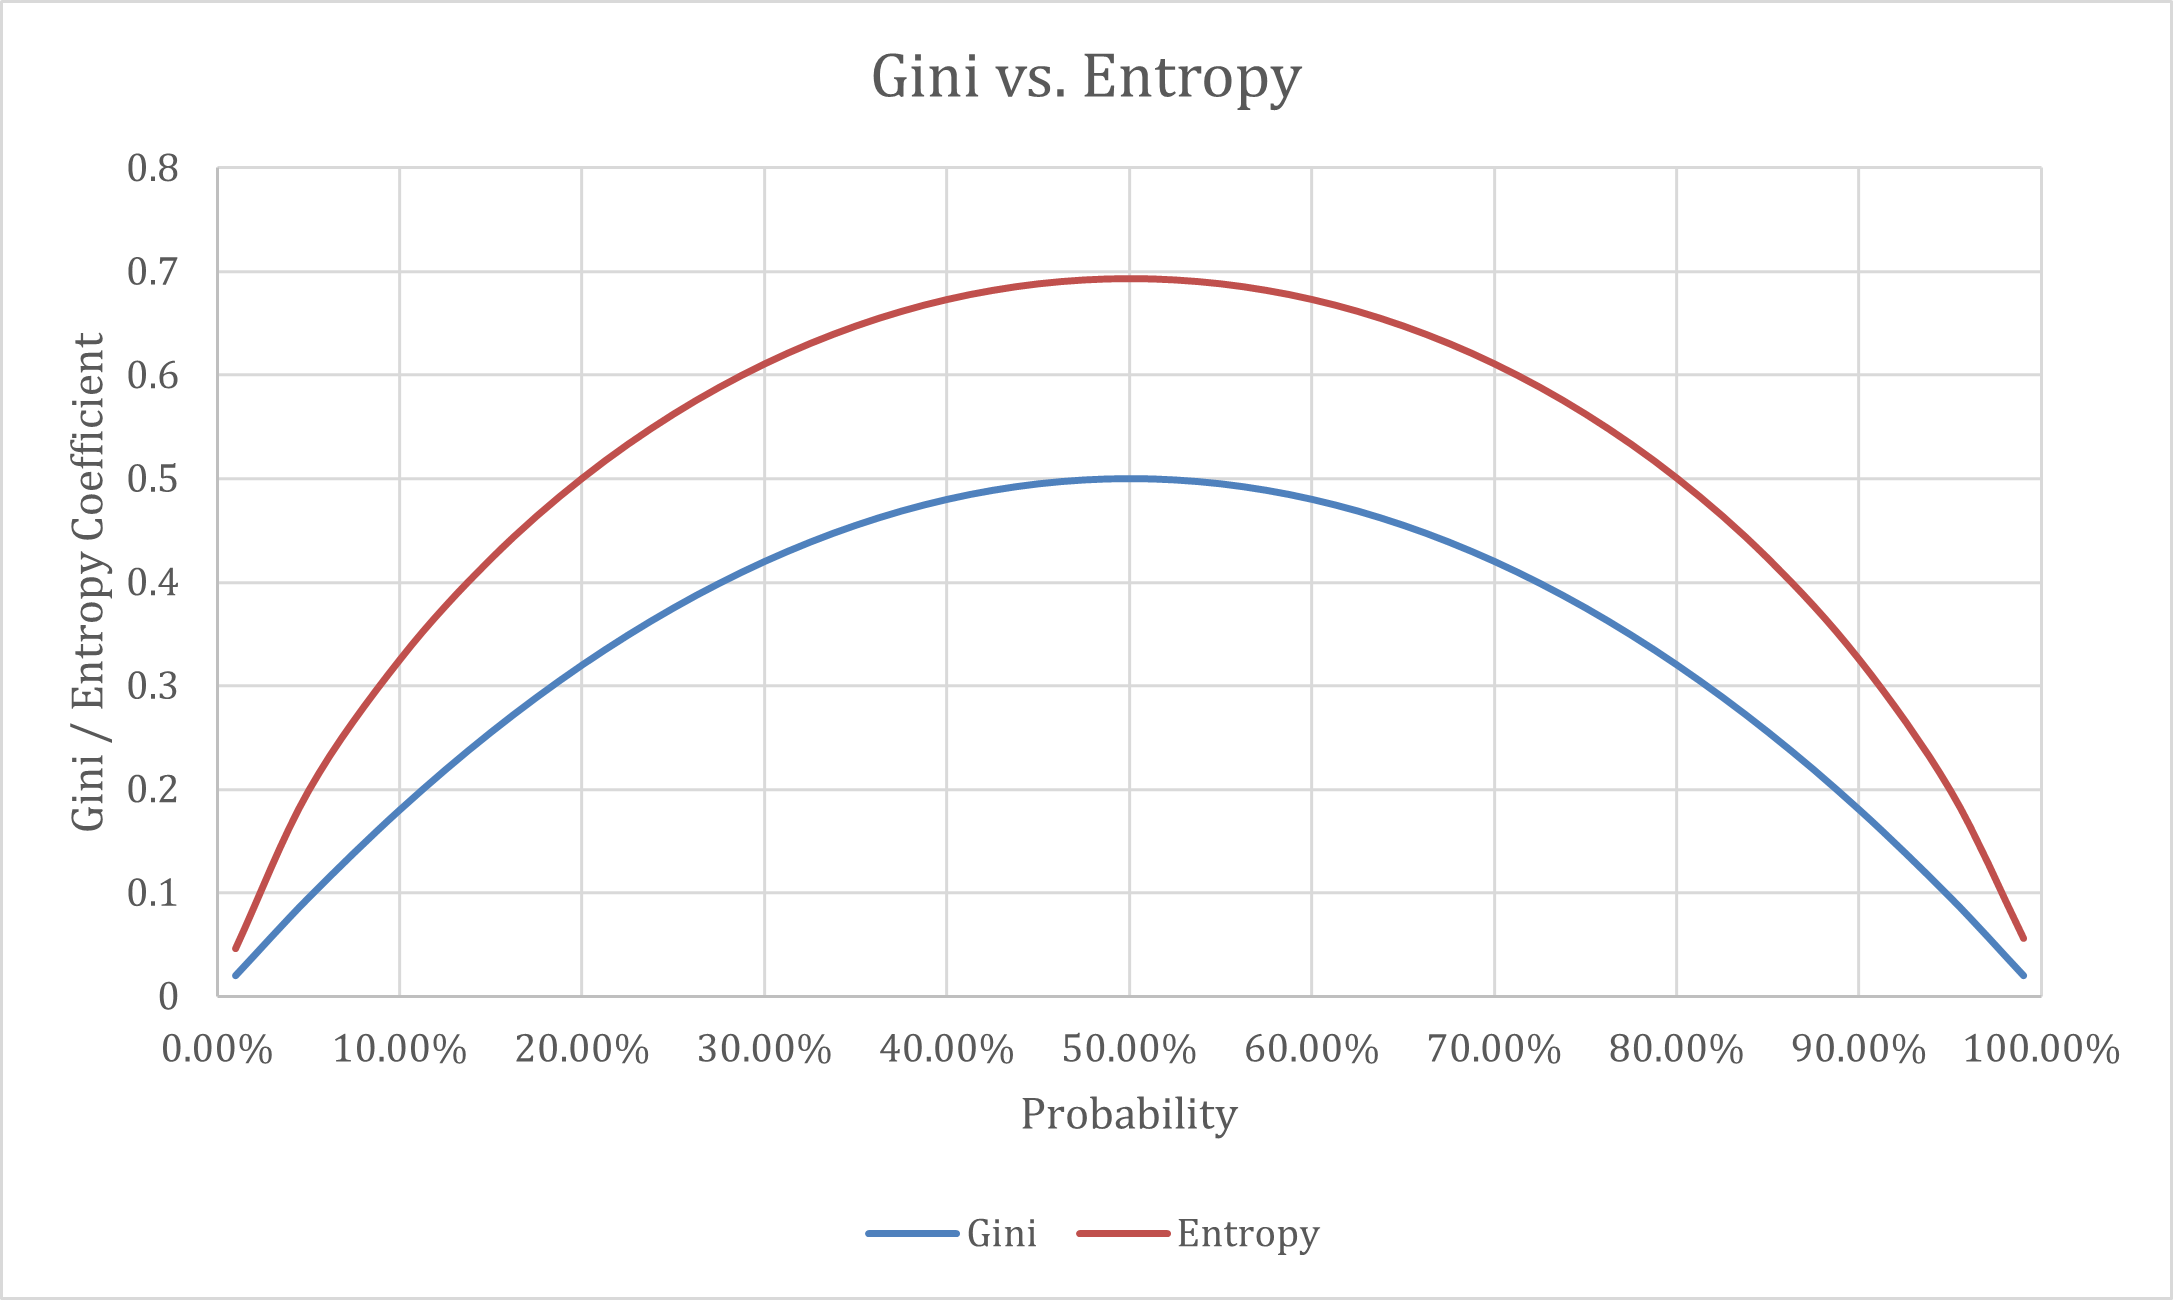

# Random Forests and Gradient Boosting

Random forests and gradient boosting are two powerful ensemble learning techniques used in machine learning for classification and regression tasks. Both methods combine the predictions of multiple base learners (usually decision trees) to improve accuracy and robustness. However, they differ significantly in their approach and methodology.

# Random Forests
Definition: Random forests are an ensemble learning method that constructs a multitude of decision trees at training time and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## Key Concepts:

### Bagging (Bootstrap Aggregating):

Random forests use bagging to create multiple subsets of the training data.  Each subset is created by random sampling with replacement.
A decision tree is trained on each subset.
Random Feature Selection:

At each split in the decision tree, a random subset of features is selected. This introduces diversity among the trees and reduces the correlation between them.

### Majority Voting/Averaging:

For classification tasks, the final prediction is made by majority voting of the individual tree predictions.
For regression tasks, the final prediction is the average of the individual tree predictions.

###Advantages:

Robust to overfitting due to averaging multiple trees.
Handles large datasets with higher dimensionality.
Provides feature importance, aiding in feature selection.

###Disadvantages:

Can be computationally expensive with large forests.
Less interpretable than a single decision tree.


#Gradient Boosting

Definition: Gradient boosting is an ensemble technique that builds models sequentially, where each new model attempts to correct the errors made by the previous models.

##Key Concepts:

###Boosting:

Unlike bagging, boosting trains models sequentially.
Each model is trained to correct the errors of its predecessor.

###Gradient Descent:

Gradient boosting uses gradient descent to minimize a loss function.
At each step, the algorithm fits a new model to the negative gradient of the loss function (hence the name "gradient boosting").

###Weighted Predictions:

The final prediction is a weighted sum of the predictions from all models.
Early models have higher weights if they contribute more to reducing the loss.

###Advantages:

Can achieve high predictive accuracy.
Effective for both regression and classification tasks.
Can handle complex data patterns and interactions.

###Disadvantages:

Prone to overfitting if not properly tuned (requires careful regularization).
More sensitive to noisy data and outliers.
More computationally intensive and requires longer training times compared to random forests.


In [ ]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn_extra.cluster import KMedoids
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Data Set

In [ ]:
# Load the dataset
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
# Extract features and target variable
X_train = train.drop('Bankrupt', axis=1)
y_train = train['Bankrupt']
X_test = test.drop('Bankrupt', axis=1)
y_test = test['Bankrupt']
X_train

,Year,AR_by_OpIncome,FB_Plus_OpInc_ByFB,PercentMedicaidDays,PercentMedicareDays,CurrentRatio,Debt2Equity,DaysSalesOutstanding,LaborCompRatio,OpProfitMargin,...,D_AltmanX3,D_AltmanX4,D_OhlsonX1,D_OhlsonX2,D_OhlsonX4,D_OhlsonX6,D_OhlsonX7,D_OhlsonX9,NegLiab.y.1.,NegLiab.y.2.
0,2015,0.017000,1.620000,0.030000,0.230000,0.450000,-0.780000,-213.120000,6.340000,-10.460000,...,-0.758261,-3.000000,0.253539,-0.795564,-1.406593,-0.801083,0.205882,-3.883192,0,0
1,2014,3.304000,0.720000,0.220000,0.300000,0.980000,1.980000,48.800000,0.500000,-0.040000,...,-1.600000,-1.750000,0.010036,-0.047059,-0.128205,-1.428571,-1.666667,-1.801628,0,0
2,2019,0.103000,2.790000,0.060000,0.300000,0.410000,-0.230000,41.950000,0.430000,-0.110000,...,-0.466667,-0.636364,-0.022936,0.450000,0.601307,-0.282051,-0.621622,-0.582509,0,0
3,2018,6.385000,1.020000,0.010000,0.140000,-1.420000,0.000000,70.310000,0.330000,0.010000,...,-0.142857,-0.513705,-0.014770,7.333333,7.750000,-0.400000,-0.290405,-0.513705,1,0
4,2010,0.034000,1.400000,0.040000,0.210000,0.400000,-0.800000,34.560000,0.610000,-0.280000,...,-0.082353,-3.428571,-0.011807,0.301961,0.168224,-0.739130,-0.303030,-3.821945,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,2016,7.394783,0.773987,0.038687,0.329700,3.461337,0.859792,78.607294,0.357880,0.017166,...,2.019592,-5.383873,-0.006276,-0.469018,-0.314988,-2.812982,9.105744,-2.748696,0,0
3022,2017,0.169956,4.621186,0.112272,0.091811,2.363183,-42.507427,56.301845,0.402261,-0.096355,...,-0.822657,-7.240448,0.006412,0.043776,-0.035743,-6.500572,-0.806031,-11.491161,0,0
3023,2014,0.050149,0.273225,0.175816,0.497021,0.530533,2.667062,30.608120,0.562979,-0.158653,...,0.143618,-1.173800,-0.020591,1.366980,0.684866,-2.692016,-0.211918,0.182499,0,0
3024,2014,0.633813,-0.061561,0.045278,0.379498,0.883430,0.723879,73.462689,0.824057,-0.550000,...,0.487561,18.238788,-0.005512,0.166384,0.776022,3.938953,0.246138,15.337460,0,0


In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1513,   33]))

# Split, Balance, and Scale

In [ ]:
# Split into training and test sets


# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = MinMaxScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Train and Evaluate Function

In [ ]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    return {
        "conf_matrix": conf_matrix,
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "y_prob": y_prob
    }

# Build Models

In [ ]:
# Train and evaluate models
models = {
    "Neural Network": MLPClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Histogram GB": HistGradientBoostingClassifier(random_state=42),
    "LDA": lda(),
    "QDA": qda()
}


# Get Results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


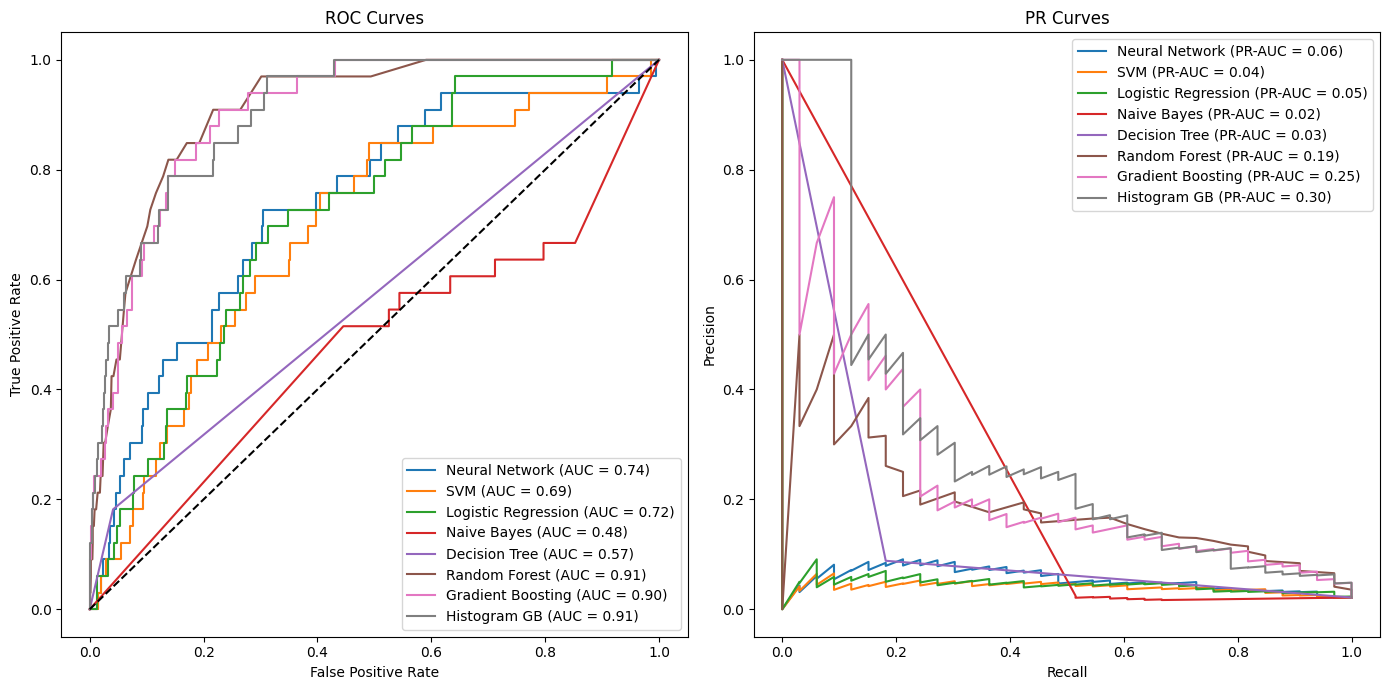

,Neural Network,SVM,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,Gradient Boosting,Histogram GB
accuracy,0.930142,0.908150,0.882924,0.510349,0.942432,0.977361,0.969599,0.978008
f1,0.129032,0.065789,0.081218,0.042984,0.118812,0.146341,0.253968,0.291667
precision,0.087912,0.042017,0.048780,0.022427,0.088235,0.375000,0.266667,0.466667
recall,0.242424,0.151515,0.242424,0.515152,0.181818,0.090909,0.242424,0.212121
roc_auc,0.735945,0.692844,0.718901,0.479170,0.570420,0.909351,0.904945,0.905025
pr_auc,0.057733,0.042695,0.047449,0.022886,0.033507,0.193977,0.246433,0.301505


In [ ]:
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train_balanced, y_train_balanced, X_test, y_test)

# Display the results
metrics = ["accuracy", "f1", "precision", "recall", "roc_auc", "pr_auc"]
results_df = pd.DataFrame({model: {metric: results[model][metric] for metric in metrics} for model in models})

# Plot AUC and PR-AUC curves
plt.figure(figsize=(14, 7))

# Plot ROC curves
plt.subplot(1, 2, 1)
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result["y_prob"])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Plot PR curves
plt.subplot(1, 2, 2)
for model_name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result["y_prob"])
    plt.plot(recall, precision, label=f'{model_name} (PR-AUC = {result["pr_auc"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

results_df



# Confusion Matrix Display

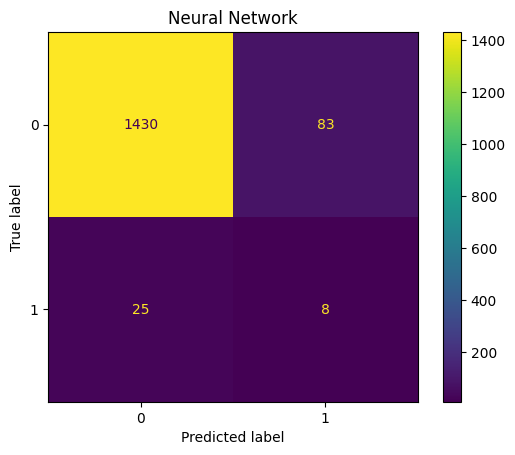

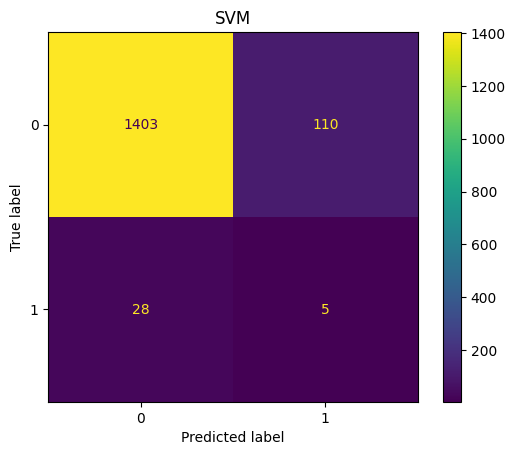

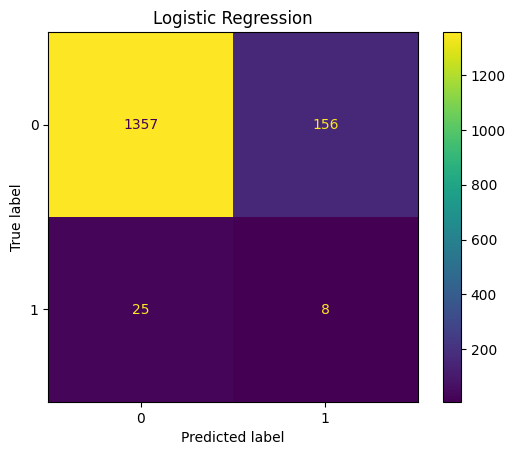

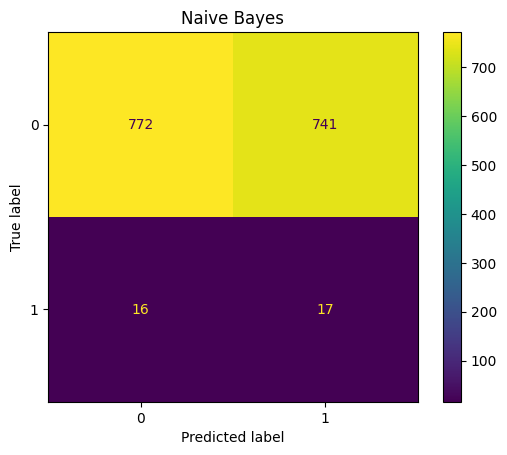

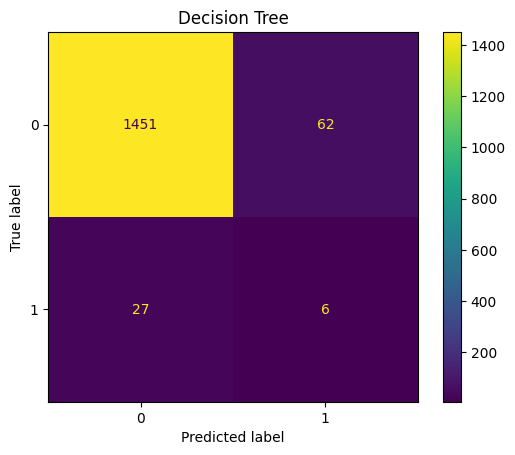

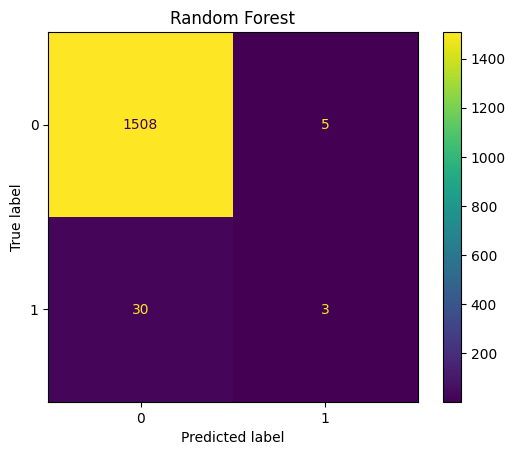

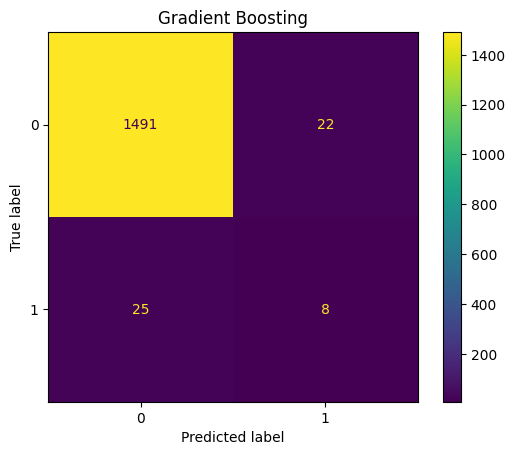

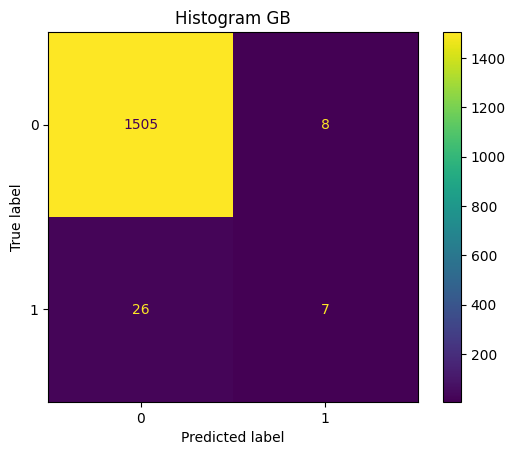

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot Confusion Matrices
for model_name, result in results.items():
    myconf=confusion_matrix(y_test, np.round(result["y_prob"],0).astype('int'))
    disp=ConfusionMatrixDisplay(confusion_matrix=myconf)
    disp.plot()
    disp.ax_.set_title(model_name)
    plt.show()


plt.tight_layout()
plt.show()